In [1]:
from sentence_transformers import SentenceTransformer, util
encoder = SentenceTransformer("sentence-transformers/gtr-t5-base")

/home/dominik/Desktop/TML-decoder/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tokenizer = encoder.tokenizer
vocab = tokenizer.vocab

In [4]:
extra_tokens = [k for k,v in vocab.items() if "<extra_id_" in k]
len(extra_tokens)


100

In [5]:
base_tokens = extra_tokens[:64]

In [9]:
%pprint

Pretty printing has been turned OFF


In [10]:
print(base_tokens)

['<extra_id_97>', '<extra_id_5>', '<extra_id_28>', '<extra_id_52>', '<extra_id_56>', '<extra_id_46>', '<extra_id_41>', '<extra_id_9>', '<extra_id_89>', '<extra_id_25>', '<extra_id_40>', '<extra_id_99>', '<extra_id_80>', '<extra_id_57>', '<extra_id_54>', '<extra_id_0>', '<extra_id_8>', '<extra_id_21>', '<extra_id_37>', '<extra_id_11>', '<extra_id_32>', '<extra_id_67>', '<extra_id_12>', '<extra_id_73>', '<extra_id_34>', '<extra_id_98>', '<extra_id_22>', '<extra_id_81>', '<extra_id_51>', '<extra_id_58>', '<extra_id_14>', '<extra_id_61>', '<extra_id_35>', '<extra_id_85>', '<extra_id_65>', '<extra_id_95>', '<extra_id_18>', '<extra_id_38>', '<extra_id_33>', '<extra_id_48>', '<extra_id_82>', '<extra_id_69>', '<extra_id_27>', '<extra_id_6>', '<extra_id_86>', '<extra_id_93>', '<extra_id_63>', '<extra_id_10>', '<extra_id_88>', '<extra_id_59>', '<extra_id_17>', '<extra_id_50>', '<extra_id_2>', '<extra_id_23>', '<extra_id_31>', '<extra_id_29>', '<extra_id_68>', '<extra_id_72>', '<extra_id_39>', '<

In [11]:
encoded_base_tokens = [vocab[token] for token in base_tokens]
print(encoded_base_tokens)

[32002, 32094, 32071, 32047, 32043, 32053, 32058, 32090, 32010, 32074, 32059, 32000, 32019, 32042, 32045, 32099, 32091, 32078, 32062, 32088, 32067, 32032, 32087, 32026, 32065, 32001, 32077, 32018, 32048, 32041, 32085, 32038, 32064, 32014, 32034, 32004, 32081, 32061, 32066, 32051, 32017, 32030, 32072, 32093, 32013, 32006, 32036, 32089, 32011, 32040, 32082, 32049, 32097, 32076, 32068, 32070, 32031, 32027, 32060, 32022, 32057, 32008, 32037, 32039]


In [12]:
encoded_base_tokens.append(1) #EOS token

In [13]:
for param in encoder.parameters():
    param.requires_grad = False

In [14]:
encoder[0]._modules['auto_model']._modules['encoder']._modules['embed_tokens']._parameters['weight'].requires_grad = True

In [15]:
text = """Positional control of pneumatic manipulators for construction tasks
This paper describes solutions that can be applied to pneumatic manipulator
	problems in positioning, both for angle trajectories and for long
	linear trajectories, used in construction tasks. Optimal positioning of
	a pneumatic manipulator along angle trajectories with minimum control
	energy consumption is given. The implementation of the control system
	is presented. Control algorithms for a long linear trajectory
	manipulator based on two-phase and three-phase motion modes of the
	end-effector are investigated. Conventional and fuzzy logic controls of
	a pneumatic manipulator were applied and experimental testing was
	carried out. The obtained results allow widening the application range
	of pneumatic manipulators in construction, particularly in gantry type
	machines"""

In [16]:
import tqdm

In [18]:
target = encoder.encode(text, convert_to_tensor=True)
target

tensor([-3.4522e-02, -2.0345e-02,  4.4846e-02,  4.3781e-02,  6.6984e-03,
        -1.8696e-02, -4.3338e-02,  1.8912e-02,  8.9696e-03,  2.7137e-03,
         1.6950e-02, -2.0354e-02,  1.0852e-01,  1.3285e-02,  1.3685e-02,
         2.7942e-02,  2.6128e-03, -1.5857e-02, -3.0513e-03,  4.2882e-02,
        -1.8843e-02,  1.4864e-02, -3.9060e-02, -1.5590e-02, -2.5479e-02,
         3.8258e-02,  3.9095e-03, -2.3293e-02, -2.8936e-02,  4.1718e-02,
         4.9773e-02, -2.1919e-03, -7.3746e-03, -1.3982e-03, -6.4718e-02,
         4.6749e-03, -1.7485e-02, -5.7901e-02, -2.5006e-02,  5.1150e-02,
        -5.2957e-03, -5.9133e-02, -1.9317e-02,  3.6850e-02, -2.4994e-02,
        -4.6451e-02, -7.1007e-03,  3.8157e-02, -4.1946e-03, -5.7547e-02,
        -3.2545e-02, -3.8071e-02, -9.4392e-03, -3.3609e-02, -1.1708e-02,
        -8.9969e-03, -1.1235e-02,  5.2750e-02,  9.6781e-03, -6.6007e-03,
        -2.8215e-02,  5.3952e-02, -7.5387e-03,  4.9737e-03, -1.5257e-02,
         4.3583e-02, -5.6956e-02, -4.3055e-02, -2.4

  2%|▎         | 5/200 [00:00<00:08, 22.61it/s]

Epoch 0 Similarity 0.49744534492492676


  7%|▋         | 14/200 [00:00<00:06, 27.88it/s]

Epoch 10 Similarity 0.762125551700592


 13%|█▎        | 26/200 [00:00<00:06, 28.96it/s]

Epoch 20 Similarity 0.8755427598953247


 18%|█▊        | 35/200 [00:01<00:05, 29.24it/s]

Epoch 30 Similarity 0.9178289771080017


 22%|██▏       | 44/200 [00:01<00:05, 29.50it/s]

Epoch 40 Similarity 0.9375391602516174


 28%|██▊       | 56/200 [00:01<00:04, 29.69it/s]

Epoch 50 Similarity 0.9546868205070496


 32%|███▎      | 65/200 [00:02<00:04, 29.54it/s]

Epoch 60 Similarity 0.9563139081001282


 38%|███▊      | 75/200 [00:02<00:04, 29.66it/s]

Epoch 70 Similarity 0.9572295546531677


 42%|████▏     | 84/200 [00:02<00:03, 29.69it/s]

Epoch 80 Similarity 0.9667676091194153


 48%|████▊     | 96/200 [00:03<00:03, 29.82it/s]

Epoch 90 Similarity 0.9604896306991577


 52%|█████▎    | 105/200 [00:03<00:03, 29.78it/s]

Epoch 100 Similarity 0.9638795852661133


 57%|█████▋    | 114/200 [00:03<00:02, 29.55it/s]

Epoch 110 Similarity 0.9599021673202515


 64%|██████▎   | 127/200 [00:04<00:02, 29.85it/s]

Epoch 120 Similarity 0.9650313258171082


 68%|██████▊   | 137/200 [00:04<00:02, 29.91it/s]

Epoch 130 Similarity 0.9660426378250122


 74%|███████▎  | 147/200 [00:05<00:01, 30.05it/s]

Epoch 140 Similarity 0.9719964861869812


 77%|███████▋  | 154/200 [00:05<00:01, 29.96it/s]

Epoch 150 Similarity 0.9674225449562073


 82%|████████▎ | 165/200 [00:05<00:01, 29.92it/s]

Epoch 160 Similarity 0.9700614213943481


 88%|████████▊ | 175/200 [00:05<00:00, 29.92it/s]

Epoch 170 Similarity 0.9550883173942566


 92%|█████████▎| 185/200 [00:06<00:00, 29.94it/s]

Epoch 180 Similarity 0.9571087956428528


 98%|█████████▊| 195/200 [00:06<00:00, 29.86it/s]

Epoch 190 Similarity 0.9681198596954346


100%|██████████| 200/200 [00:06<00:00, 29.41it/s]


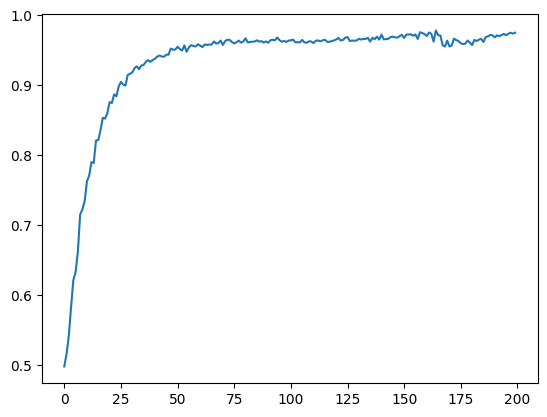

In [21]:
from torch import nn
import torch
import torch.optim as optim
from torch.nn import CosineSimilarity


assert any(p.requires_grad for p in encoder.parameters())

optimizer = optim.Adam(encoder.parameters(), lr=1)
from torch.optim.lr_scheduler import CosineAnnealingLR
scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0.0001)
criterion = nn.CosineEmbeddingLoss()
input_ids = torch.tensor(encoded_base_tokens).unsqueeze(0).to('cuda')
attention_mask = torch.ones_like(input_ids).to('cuda')

best = float("inf")
best_embedding = None
sims = []
encoder.train()
for epoch in tqdm.tqdm(range(200)):
    optimizer.zero_grad()
    output = encoder({
        "input_ids": input_ids,
        "attention_mask": attention_mask,
    })["sentence_embedding"]
    
    loss = criterion(output.squeeze(), target, torch.tensor(1.0))
    loss.backward()
    # set grad of non-new token to 0
    # all ids except new_token_id
    non_new_token_ids = [i for i in range(len(tokenizer.vocab)) if i not in encoded_base_tokens]
    new_token_ids = [i for i in range(len(tokenizer.vocab)) if i in encoded_base_tokens]
    encoder[0]._modules["auto_model"]._modules["encoder"]._modules[
            "embed_tokens"
        ]._parameters["weight"].grad[non_new_token_ids] = 0

    optimizer.step()
    scheduler.step()
    sims.append(1 - loss.item())

    if loss.item() < best:
        best = loss.item()
        best_embedding = encoder[0]._modules["auto_model"]._modules["encoder"]._modules[
            "embed_tokens"
        ]._parameters["weight"].data[new_token_ids].cpu().numpy()
    if epoch % 10 == 0:
        print(f"Epoch {epoch} Similarity {1 - loss.item()}")
import matplotlib.pyplot as plt
plt.plot(sims)
plt.show()

In [32]:
print(input_ids)

tensor([[32002, 32094, 32071, 32047, 32043, 32053, 32058, 32090, 32010, 32074,
         32059, 32000, 32019, 32042, 32045, 32099, 32091, 32078, 32062, 32088,
         32067, 32032, 32087, 32026, 32065, 32001, 32077, 32018, 32048, 32041,
         32085, 32038, 32064, 32014, 32034, 32004, 32081, 32061, 32066, 32051,
         32017, 32030, 32072, 32093, 32013, 32006, 32036, 32089, 32011, 32040,
         32082, 32049, 32097, 32076, 32068, 32070, 32031, 32027, 32060, 32022,
         32057, 32008, 32037, 32039,     1]], device='cuda:0')


In [53]:
disc_tokens = [None for _ in encoded_base_tokens]
cos_sims = [float('-inf') for _ in encoded_base_tokens]
inv_vocab = {v: k for k,v in vocab.items()}
for token in tqdm.tqdm(range(len(vocab))):
    token_embedding = encoder[0]._modules["auto_model"]._modules["encoder"]._modules[
            "embed_tokens"
        ]._parameters["weight"].data[token]
    if '<extra_id' in inv_vocab[token] or token == 1:
        continue
    for i, special_token in enumerate(encoded_base_tokens):
        special_token_embedding = encoder[0]._modules["auto_model"]._modules["encoder"]._modules[
            "embed_tokens"
        ]._parameters["weight"].data[special_token]
        cs = CosineSimilarity()(token_embedding.unsqueeze(0), special_token_embedding.unsqueeze(0)).item()
        if cs > cos_sims[i]:
            cos_sims[i] = cs
            disc_tokens[i] = token

100%|██████████| 32100/32100 [01:19<00:00, 401.66it/s]


In [54]:
print(disc_tokens)

disc_output = encoder({
        "input_ids": torch.tensor(disc_tokens).unsqueeze(0).to('cuda'),
        "attention_mask": attention_mask,
    })["sentence_embedding"]

print(CosineSimilarity()(target, disc_output))

def get_tokens(enc_text):
    tokens = [inv_vocab[item] for item in enc_text]
    return tokens
print("".join(get_tokens(disc_tokens)))

[6385, 5945, 6385, 6385, 6385, 6385, 6385, 20479, 6385, 593, 6385, 6385, 6385, 6385, 6385, 85, 13129, 634, 6385, 25371, 6385, 6385, 7762, 6385, 8853, 6385, 1853, 6385, 6385, 6385, 11285, 8853, 8853, 8853, 6385, 6385, 665, 8853, 6385, 8853, 8853, 6385, 15063, 9139, 6385, 6385, 6385, 17018, 6385, 6385, 18427, 6385, 9, 19552, 6385, 6385, 6385, 8853, 6385, 6385, 8853, 6385, 8853, 6385, 345]
tensor([0.5779], device='cuda:0', grad_fn=<SumBackward1>)
▁Its▁Gen▁Its▁Its▁Its▁Its▁Its▁internațional▁Its▁level▁Its▁Its▁Its▁Its▁Itsà▁WideThe▁Its▁duminică▁Its▁Its▁Cons▁Its▁mes▁Its▁THE▁Its▁Its▁Itsoferă▁mes▁mes▁mes▁Its▁Its▁einem▁mes▁Its▁mes▁mes▁Its▁cazuri▁Organization▁Its▁Its▁Its▁inima▁Its▁Its▁viaţa▁ItsaEAD▁Its▁Its▁Its▁mes▁Its▁Its▁mes▁Its▁mes▁ItsP
